In [ ]:
# Импорт необходимых библиотек

# возвращение списка (возможно, пустого) путей, соответствующих шаблону pathname
from glob import glob

# библиотека для работы с файлами
import os
import shutil

import random
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive # подключаем гугл драйв диск для загрузки файлов
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
# загрузка датасета c Roboflow (ссылку берём при export dataset/show code/terminal)
!curl -L "https://app.roboflow.com/ds/3rGfNDNZc4?key=fphBhJ7yiW" > roboflow.zip
!unzip -q -o roboflow.zip -d /content/drive/MyDrive/Helmets
!rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   2242      0 --:--:-- --:--:-- --:--:--  2240
100 32.2M  100 32.2M    0     0  31.7M      0  0:00:01  0:00:01 --:--:-- 31.7M


In [ ]:
source_dir = '/content/drive/MyDrive/Helmets'

In [ ]:
def get_file_paths(folder_with_labels):

    '''
    Функция для получения списка файлов в папке с путями к ним
    Args:
        folder_with_labels - адрес папки
    Return:
        список файлов с путями
    '''

    return glob(folder_with_labels, recursive=True)

In [ ]:
def ch_class_num(path, old, new):

    '''
    Функция для замены номера класса в файле
    Args:
        path - путь с файлом
        old - старое значение (int)
        new - новое значение (int)
    Return:
        число замен (int)
    '''
    with open(path, 'r') as file1:

      new_list = []
      cnt = 0

      for line in file1:
        split_line = line.strip().split()
        new_str = split_line[0]

        if int(new_str) == old:
          cnt+=1
          split_line.pop(0)
          new_str = str(new)
          split_line.insert(0,new_str)

        out_str = ' '.join(map(str, split_line))
        new_list.append(out_str)

    with open(path, 'w') as file1:
      for  line in new_list:
        file1.write(line+ '\n')
    return cnt

```
У меня          Цель
0: 'Hardhat'    0: 'Hardhat'
1: 'No_Hardhat' 2: 'NO-Hardhat'
2: 'Person'     5: 'Person'
```



In [ ]:
# Словарь наших классов
cname = {
          0: 'Hardhat',
          2: 'NO-Hardhat',
          5: 'Person'
        }

In [ ]:
# Получаем список путей ко всем файлам меток с их именами
lbl_file_list = get_file_paths(source_dir + '/train/labels/' + '/**' + '/*.txt')

# Получаем список путей ко всем файлам картинок с их именами
img_file_list = get_file_paths(source_dir + '/train/images' + '/**' + '/*.jpg')

print(len(lbl_file_list))
print(lbl_file_list[0])

print(len(img_file_list))
print(img_file_list[0])

500
/content/drive/MyDrive/Helmets/train/labels/data1_0021092_jpg.rf.7e32a74a43da5d03da2a2d105c787581.txt
500
/content/drive/MyDrive/Helmets/train/images/data1_0009620_jpg.rf.4fd67a97c8875f83e71a30dff6906d3d.jpg


In [ ]:
# делаем замену номера класса 2 на 5
cnt=0
for files in lbl_file_list:
  cnt+=ch_class_num(files,2,5)
print(f'Сделано {cnt} замен(ы) в {len(lbl_file_list)} файлах')

Сделано 884 замен(ы) в 500 файлах


In [ ]:
# делаем замену номера класса 1 на 2
cnt=0
for files in lbl_file_list:
  cnt+=ch_class_num(files,1,2)
print(f'Сделано {cnt} замен(ы) в {len(lbl_file_list)} файлах')

Сделано 260 замен(ы) в 500 файлах




```
не забыть поправить наименование или порядок в yaml, если нужно
```



In [ ]:
# присланный вариант nc:10
data_yaml = '''
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 10
names: ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']

roboflow:
  workspace: rudn-17lnp
  project: hamlet-detection-system-2.0
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/rudn-17lnp/hamlet-detection-system-2.0/dataset/1
'''

with open(source_dir + '/_data.yaml', 'w') as file:
    file.write(data_yaml)

In [ ]:
def clf (file_list, cls):

    '''
    Функция из file_list формирует новый список файлов с путями
    где встречается нужный номер класса cls
    Args:
        file_list - список файлов
        cls - искомый класс (int)
    Return:
        список файлов где встречается искомый класс
    '''
    new_files_list = []

    for fls in file_list:

     with open(fls, 'r') as file1:

        for line in file1:

          if int(line.split()[0]) == cls:
            new_files_list.append(fls)
            break

    return new_files_list


In [ ]:
'''
    К коду ниже... Метод как бы не точный, поскольку в одном файле с персоной
    без каски, могут быть несколько персон в касках.
    Метод определяет факт наличия в файле меток нужного класса,
    а не их количество и на основании этого формирует новый список
'''
# Находим сколько файлов с персоной без каски
lbl_2_list = clf(lbl_file_list, 2)
# Проверим уникальность значений списка
print(len(lbl_2_list), len(set(lbl_2_list)))

183 183


In [ ]:
# Находим сколько из них содержат персону с каскими
lbl_0_in_2_list = clf(lbl_2_list, 0)
print(len(lbl_0_in_2_list), len(set(lbl_0_in_2_list)))

17 17


In [ ]:
# Находим разницу = сколько нужно добавить персон с касками для ровного набора
len(lbl_2_list) - len(lbl_0_in_2_list)

166

In [ ]:
# Функция для получения точной статистики номеров икличеству классов по списку с именами файлов

def get_lbs_stat(labels_file_list):
  '''
  Функция считает классы в файлах меток
  (формат YOLOv8 - номер класса первый символ в строке)
  Args:
      labels_file_list - список файлов меток с путями
  Return:
      словарь вида номер {класса:количество}
      количество обработанных файлов cnt_files
  '''
  lbs_lst = []
  cnt_files = 0

  for label_file in labels_file_list:

      with open(label_file, 'r') as file:

        for line in file:
            lbs_lst.append(line.split()[0])

      cnt_files+=1

  unique_classes, counts = np.unique(lbs_lst, return_counts=True)
  # return list(unique_classes.astype(int)), list(counts.astype(int))
  # мы не ищем легких путей загоним все в словарь :)
  return dict(zip(list(unique_classes.astype(int)), list(counts.astype(int)))), cnt_files

In [ ]:
# Пример: lbl_2_list - список файлов где встречается класс 2 после функции clf
stat_dict, cntf = get_lbs_stat(lbl_2_list)

for key, value in stat_dict.items():
  print(key, cname[key], '=>', value)

print('Количество файлов', cntf)

0 Hardhat => 21
2 NO-Hardhat => 260
5 Person => 281
Количество файлов 183


In [ ]:
# Сколько добавить касок аха а сколько это в файлах :)
stat_dict[2] - stat_dict[0]

239

In [ ]:
stat_dict, cntf = get_lbs_stat(lbl_file_list)

for key, value in stat_dict.items():
  print(key, cname[key], '=>', value)

print('Количество файлов', cntf)

0 Hardhat => 616
2 NO-Hardhat => 260
5 Person => 884
Количество файлов 500


In [ ]:
239/(stat_dict[0]/cntf)

193.9935064935065

In [ ]:
lbs_dir = source_dir + '/train/labels/'
img_dir = source_dir + '/train/images/'

new_lbs_dir = '/content/Helmets/train/labels/'
new_img_dir = '/content/Helmets/train/images/'

In [ ]:
# Код переноса
os.makedirs(new_lbs_dir, exist_ok=True)
os.makedirs(new_img_dir, exist_ok=True)

lbl_flist_tmp = lbl_file_list

for filename in lbl_flist_tmp:
    if filename in lbl_2_list:
      shutil.copy(lbs_dir + os.path.split(filename)[1],
                  new_lbs_dir + os.path.split(filename)[1])
      shutil.copy(img_dir + os.path.splitext(os.path.split(filename)[1])[0]+'.jpg',
                  new_img_dir + os.path.splitext(os.path.split(filename)[1])[0]+'.jpg')

random.shuffle(lbl_flist_tmp)
coutdown = len(lbl_2_list) - len(lbl_0_in_2_list) - 39 # ручное управление

for filename in lbl_flist_tmp:
    if (filename not in lbl_2_list) and (coutdown > 0):
      shutil.copy(lbs_dir + os.path.split(filename)[1],
                  new_lbs_dir + os.path.split(filename)[1])
      shutil.copy(img_dir + os.path.splitext(os.path.split(filename)[1])[0]+'.jpg',
                  new_img_dir + os.path.splitext(os.path.split(filename)[1])[0]+'.jpg')
      coutdown-=1

In [ ]:
print(len(os.listdir(new_lbs_dir)), len(set(os.listdir(new_lbs_dir))))

310 310


In [ ]:
print (len(os.listdir(new_img_dir)), len(set(os.listdir(new_img_dir))))

310 310


In [ ]:
# Визуализация распределения классов в каждой выборке (папке)
def get_class_distribution(label_folder_path, cl_name_dict):
    '''
    Визуализация распределения классов в выборке
    Args:
        label_folder_path - путь к каталогу с метками
        cl_name_dict - словарь классов
    '''
    lbl_fil_pth = get_file_paths(label_folder_path + '/**' + '/*.txt')
    st_dic, _ = get_lbs_stat(lbl_fil_pth)

    x = [f'{cl_name_dict[i]} {i}' for i in list(st_dic.keys())]

    fig, ax = plt.subplots(figsize=(8, 3), layout='constrained')
    bars = ax.barh(x, list(st_dic.values()), height=.4, edgecolor='gray')
    ax.bar_label(bars, padding=1, color='black', fontweight='bold')
    ax.grid()

    plt.show()

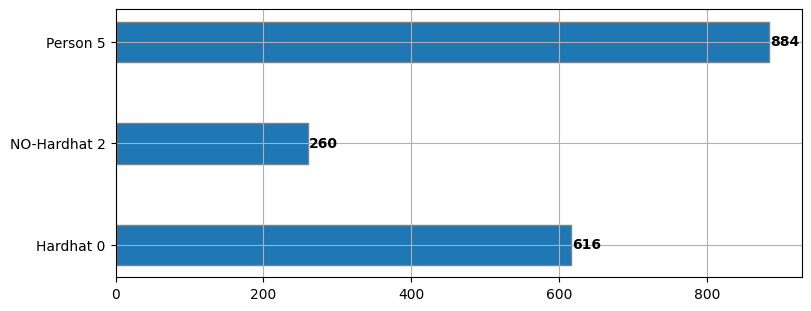

In [ ]:
# До
get_class_distribution(lbs_dir, cname)

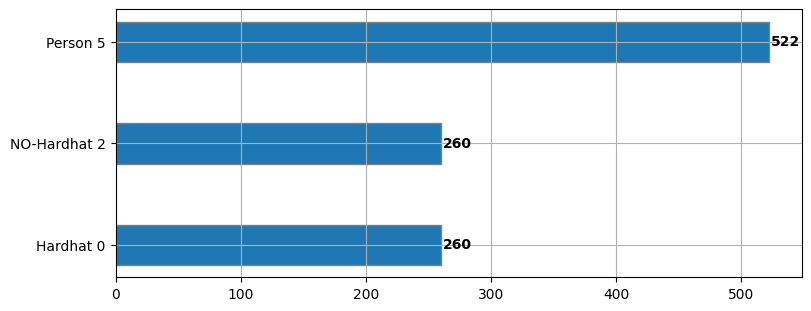

In [ ]:
# После
get_class_distribution(new_lbs_dir, cname)

In [ ]:
# Пример
print (os.path.splitext('/home/user/somefile.txt')[0]+'.jpg')

somefile.jpg


In [ ]:
# Пример
os.path.splitext('/home/user/somefile.txt')[0]

'/home/user/somefile'

In [ ]:
# Пример
os.path.split(lbl_file_list[0])[1]

'data1_0000396_jpg.rf.c8b2a60ff20fd962afa8e59f4148e48c.txt'

In [ ]:
# Пример
#drv, pth = os.path.splitdrive(lbl_file_list[0])
pth, fname = os.path.split(lbl_file_list[0])
print(pth, fname)

/content/drive/MyDrive/Helmets/train/labels data1_0000396_jpg.rf.c8b2a60ff20fd962afa8e59f4148e48c.txt


In [ ]:
!cp -r /content/Helmets/* /content/drive/MyDrive/UAI/Стажировка/_Helmets

In [ ]:
# Стирает всё
!rm -rf /content/Helmets

In [ ]:
# тестовый вариант nc:10
data_yaml = '''
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 10
names: ['Hardhat', 'Mask', 'NO-Hardhat', 'NO-Mask', 'NO-Safety Vest', 'Person', 'Safety Cone', 'Safety Vest', 'machinery', 'vehicle']
'''
with open('/content/Helmets' + '/data.yaml', 'w') as file:
    file.write(data_yaml)